In [1]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()

Let's consider our model for auto-regulation again.

$$\frac{dX}{dt} = \frac{\beta}{1+\frac{X^n}{K^n}} - \alpha X \tag{1} $$

As a reminder, $dX/dt$ defines a slope, or an expected amount of change in the variable $X$. So if we are interested in determining how $X$ will change over *time*, we can use the expected slope as a way to predict where $X$ will be in the future time point $t + \Delta t$. Concretely in mathematical terms, this looks like:

$$X(t+\Delta t) = X(t) + \left( \frac{\beta}{1+\frac{X(t)^n}{K^n}} - \alpha X(t) \right) \Delta t \tag{2} $$

In [6]:
Beta = 10 # per min 
alpha = 1 # per transcript per min
K = 5 # per cell 
n = 2

Text(0, 0.5, 'copy number of X per cell')

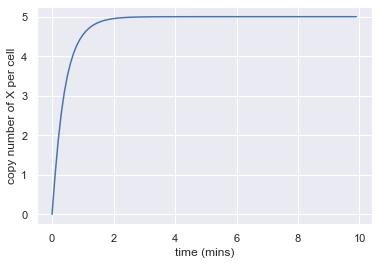

In [7]:
X = np.zeros(100)
dt = 0.1 # min

for t in range(len(X)-1):
    dX = Beta / (1 + X[t]**n/K**n) - alpha * X[t]
    X[t+1] = X[t] + dX*dt
    
t = np.arange(len(X))*dt   
plt.plot(t, X)
plt.xlabel("time (mins)")
plt.ylabel("copy number of X per cell")

## Autoregulation vs. simple regulation 

Remember that simple regulation was described as:

$$\frac{dX}{dt} = \beta - \alpha X \tag{3}$$

Below, use the Euler method to integrate Equation (3). Plot both results (autoregulation vs. simple regulation) on the same graph. Can you validate what was seen from Figure 2.6 in Alon? As a tip, you will want to change the value of $\beta$ so that the two models have the same steady state and will be more directly comparable.

Text(0, 0.5, 'copy number of X per cell')

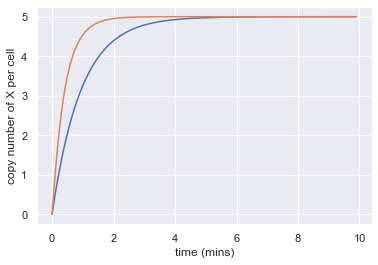

In [8]:
Xe = np.zeros(100)
Betae = 5
alphae = 1
dte = 0.1

for te in range(len(Xe)-1):
    dXe = Betae - alphae*Xe[te]
    Xe[te+1] = Xe[te] + dXe*dte
    
te = np.arange(len(Xe))*dte
plt.plot(te, Xe)
plt.plot(t,X)
plt.xlabel("time (mins)")
plt.ylabel("copy number of X per cell")

## Modeling a C1-FFL

### (a)

First specify the values of X over time, with a short pulse and a long pulse built in, like that in Figure 3.11 in Alon. Plot your resulting array to make sure that you've encoded this information correctly. 

In [21]:
Xffl = np.zeros(100)

Xffl[10:15] = 20

Xffl[40:65] = 20

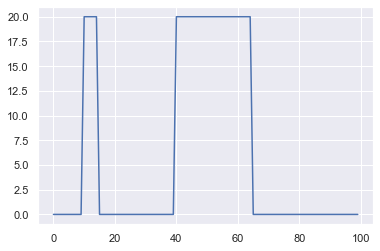

In [22]:
plt.plot(Xffl)

### (b)

Specify the two differential equations of the C1-FFL below. The production of $Y$ should be modeled as an activating Hill function that depends on $X$. The production of $Z$ should be modeled as an activating Hill function that depends on $X$ **times** an activating Hill function that depends on $Y$. Be able to explain why this acts as the desired "AND" gate.

$$\frac{dY}{dt} = \frac{\beta X^n}{K^n + X^n} -\alpha Y$$

$$\frac{dZ}{dt} = \frac{\beta X^n}{K^n + X^n} \frac{\beta Y^n}{K^n + Y^n} -\alpha Z$$

### (c)

Use Euler to integrate both $Y$ and $Z$ over time. Keep in mind that their behavior will depend on the values of the $X$ array you set up in part (a)!

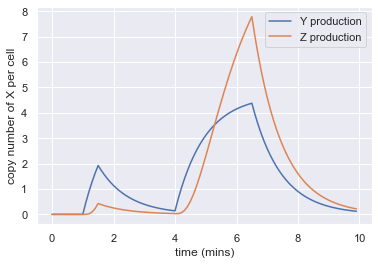

In [27]:
Y = np.zeros(100)
Z = np.zeros(100)
Beta = 5
alpha = 1
dt = 0.1

for t in range(len(Y)-1):
    dY = (Beta*Xffl[t]**n)/(K**n+Xffl[t]**n) - alpha*Y[t]
    Y[t+1] = Y[t] + dY*dt
    
    dZ = (Beta*Xffl[t]**n)/(K**n+Xffl[t]**n)*(Beta*Y[t]**n)/(K**n+Y[t]**n) - alpha*Z[t]
    Z[t+1] = Z[t] + dZ*dt
    
t = np.arange(len(Y))*dt
plt.plot(t,Y)
plt.plot(t,Z)
plt.xlabel("time (mins)")
plt.ylabel("copy number of X per cell")
plt.legend(["Y production", "Z production"])